<a href="https://colab.research.google.com/github/SOUMEE2000/Machine-Learning-Stash/blob/main/Image%20Processing%20Basics/U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import *
from keras.models  import *
from keras.optimizers import *
import keras.backend as K
import numpy as np 
import os
import skimage.io as io

In [ ]:
import tensorflow as tf


IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3


#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
#s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path
#c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
#c1 = tf.keras.layers.Dropout(0.1)(c1)
#c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
#p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c2 = tf.keras.layers.Dropout(0.2)(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
p5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c5)

c5_n = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p5)
c5_n = tf.keras.layers.Dropout(0.3)(c5_n)
c5_n = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5_n)


#Expansive path 
u6_n = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5_n)
u6_n = tf.keras.layers.concatenate([u6_n, c5])
c6_n = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6_n)
c6_n = tf.keras.layers.Dropout(0.2)(c6_n)
c6_n = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6_n)
 

u6 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
 
#u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
#u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
#c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
#c9 = tf.keras.layers.Dropout(0.1)(c9)
#c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
adam = Adam(0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

  

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Datasets/DRIVE.zip"
with ZipFile(file_name,'r') as zipf:
  zipf.extractall()
  print('finish')

finish


In [ ]:
import os

import cv2
from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
#import  scipy.misc.pilutil
data_location = ''

training_loc= "/content/DRIVE/training/images/"
training_label_loc= "/content/DRIVE/training/1st_manual/"
#training_loc_mask= "/content/DRIVE/training/mask/"

training_images= os.listdir(training_loc)
training_labels= os.listdir(training_label_loc)
#training_masks= os.listdir(training_loc_mask)

training_images.sort()
training_labels.sort()

train_data = []
train_label = []
desired_size = 256

In [ ]:
for i in training_images:
    im = plt.imread(training_loc + i)
    label = plt.imread(training_label_loc + i.split('_')[0] + '_manual1.gif')
    train_data.append(cv2.resize(im, (desired_size, desired_size)))
    temp = cv2.resize(label, (desired_size, desired_size))
    train_label.append(temp)

In [ ]:
np.array(train_label).shape

(20, 256, 256)

In [ ]:
train_label = np.array(train_label)
train_label = np.reshape(train_label, (20,desired_size, desired_size,1))

In [ ]:
train_data = np.array(train_data)

x_train = train_data.astype('float32') / 255.
y_train = train_label.astype('float32')/255

In [ ]:
model.fit( x_train, y_train, steps_per_epoch=10, epochs=1000)

Epoch 1/1000
10/10 [==============================] - 36s 96ms/step - loss: 0.5726 - accuracy: 0.8265
Epoch 2/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.4662 - accuracy: 0.8654
Epoch 3/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.4015 - accuracy: 0.8770
Epoch 4/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.3142 - accuracy: 0.8778
Epoch 5/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.2856 - accuracy: 0.8789
Epoch 6/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.2801 - accuracy: 0.8793
Epoch 7/1000
10/10 [==============================] - 1s 97ms/step - loss: 0.2773 - accuracy: 0.8792
Epoch 8/1000
10/10 [==============================] - 1s 98ms/step - loss: 0.2770 - accuracy: 0.8792
Epoch 9/1000
10/10 [==============================] - 1s 98ms/step - loss: 0.2751 - accuracy: 0.8794
Epoch 10/1000
10/10 [==============================] - 1s 98ms/step - loss: 0.2709 - accur

In [ ]:
test_images_loc='/content/DRIVE/test/test/images'

test_files= os.listdir(test_images_loc)
test_files.sort()
test_data=[]
for i in test_files:
  test_im= plt.imread('/content/DRIVE/test/test/images/' + i)
  test_data.append(cv2.resize(test_im,(desired_size, desired_size)))

test_data= np.array(test_data)
x_test = test_data/ 255.
x_test = np.reshape(x_test, (len(x_test), desired_size, desired_size, 3))  # adapt this if using `channels_first` image data format
y_pred= model.predict(x_test)

In [ ]:
y_pred.shape

(20, 256, 256, 1)

In [ ]:
test_files

['01_test.tif',
 '02_test.tif',
 '03_test.tif',
 '04_test.tif',
 '05_test.tif',
 '06_test.tif',
 '07_test.tif',
 '08_test.tif',
 '09_test.tif',
 '10_test.tif',
 '11_test.tif',
 '12_test.tif',
 '13_test.tif',
 '14_test.tif',
 '15_test.tif',
 '16_test.tif',
 '17_test.tif',
 '18_test.tif',
 '19_test.tif',
 '20_test.tif']

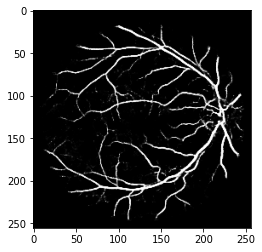

In [ ]:
from PIL import Image 
i=1
for img in y_pred:
  #arr= np.array(img)
  img= np.reshape(img, (256,256))
  #img= Image.fromarray(arr)
  plt.imshow(img*255, cmap="gray")
  path="/content/results1/test_"+ str(i) + ".jpg"
  cv2.imwrite(str(path),img*255)                    # img*255 is important for cv2 to save the image properly.
  i= i+1

## **Model 2**

In [ ]:
  
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, concatenate

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
conv1 =    Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
conv2 =    Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool4))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

model = tf.keras.Model(inputs=inputs, outputs=conv10)

model.compile(optimizer = Adam(0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit( x_train, y_train, steps_per_epoch=100, epochs=1000)

Epoch 1/1000
100/100 [==============================] - 9s 80ms/step - loss: 65122995273728.0000 - accuracy: 0.8795
Epoch 2/1000
100/100 [==============================] - 8s 79ms/step - loss: 0.2701 - accuracy: 0.8795
Epoch 3/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2691 - accuracy: 0.8795
Epoch 4/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2670 - accuracy: 0.8795
Epoch 5/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2659 - accuracy: 0.8795
Epoch 6/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2648 - accuracy: 0.8795
Epoch 7/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2643 - accuracy: 0.8795
Epoch 8/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2630 - accuracy: 0.8795
Epoch 9/1000
100/100 [==============================] - 8s 81ms/step - loss: 0.2623 - accuracy: 0.8795
Epoch 10/1000
100/100 [==============================] - 8s 

KeyboardInterrupt: ignored